In [ ]:
import climakitae as ck
from climakitae.core.data_interface import (
    get_data_options,
    get_subsetting_options,
    get_data,
)

In [ ]:
# parameters
general_params = {
    "variable": "Maximum air temperature at 2m",
    "resolution": "3 km", # CHANGE ME
    "timescale": "daily",
    "downscaling_method": "Statistical",
    "scenario": ["Historical Climate", "SSP 5-8.5"],
    "units": "degF",
    # "time_slice": ()
    "cached_area": "San Francisco County"
}

time_slices = [
    (2000,2005),
    (1961, 1990),
    (2005, 2034), 
    (2035, 2064),
    (2070, 2099)
]

In [ ]:
get_data_options(downscaling_method="Statistical", resolution="3 km",timescale="daily",scenario= ["Historical Climate", "SSP 5-8.5"])

In [ ]:
get_subsetting_options(area_subset="CA counties")

# Analysis needs
- Average annual number of extreme heat days above 90 deg F
- Average annual number of extreme heat days above 100 deg F
- Average annual number of extreme heat days above historical baseline (98th percentile)
- Average annual number of warm nights (based on historical 98th percentile)


In [11]:
def count_days_above_X_degF(data, temp_threshold_in_degF):
    return (data.mean('simulation') > temp_threshold_in_degF).groupby('time.year').sum('time').squeeze()

def avg_days_above_X_degF(data, temp_threshold_in_degF):
    return (data.mean('simulation') > temp_threshold_in_degF).groupby('time.year').sum('time').mean('year').squeeze()

In [12]:
# general_params['time_slice'] = time_slices[1]

test_data = get_data(**general_params, time_slice=time_slices[0])

In [13]:
days_above_90 = count_days_above_X_degF(test_data,90)

In [ ]:
days_above_90.compute(progress_bar=True)

In [14]:
days_above_90

<xarray.DataArray np.str_('Maximum air temperature at 2m') (year: 6, lat: 8,
                                                            lon: 28)> Size: 11kB
dask.array<getitem, shape=(6, 8, 28), dtype=int64, chunksize=(1, 5, 28), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 32B 37.67 37.7 37.73 37.77 37.8 37.83 37.86 37.89
  * lon          (lon) float32 112B -123.2 -123.1 -123.1 ... -122.4 -122.3
    scenario     <U22 88B 'Historical + SSP 5-8.5'
    spatial_ref  int64 8B 0
  * year         (year) int64 48B 2000 2001 2002 2003 2004 2005
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             daily
    location_subset:       ['San Francisco County']
    approach:              Time
    downscaling_method:    Statistical
    institution:           UCSD

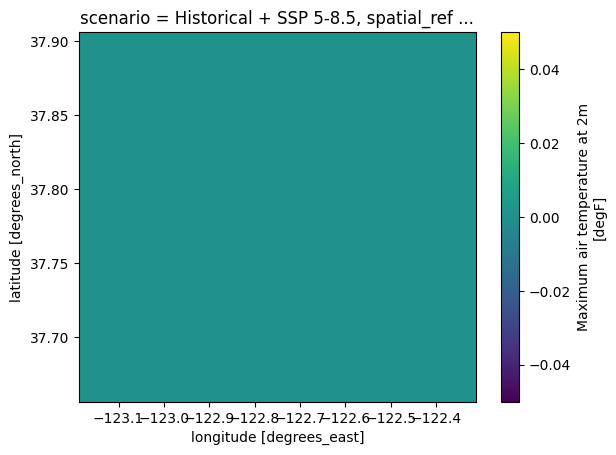

In [18]:
days_above_90.isel(year=2).squeeze().plot()